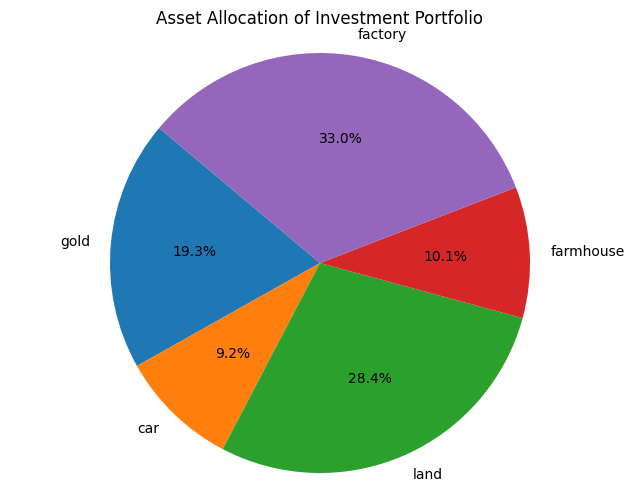

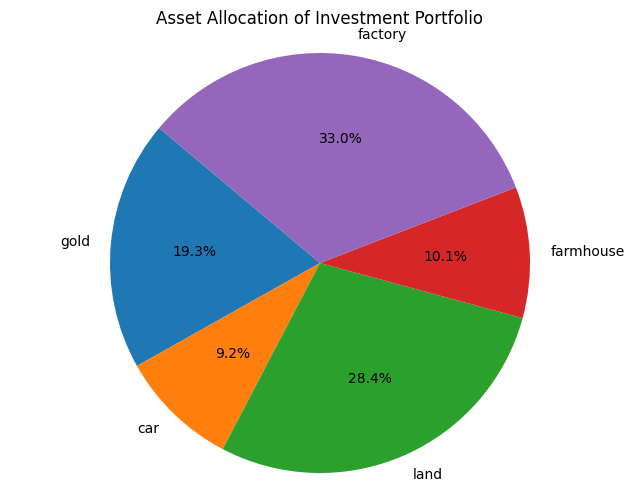

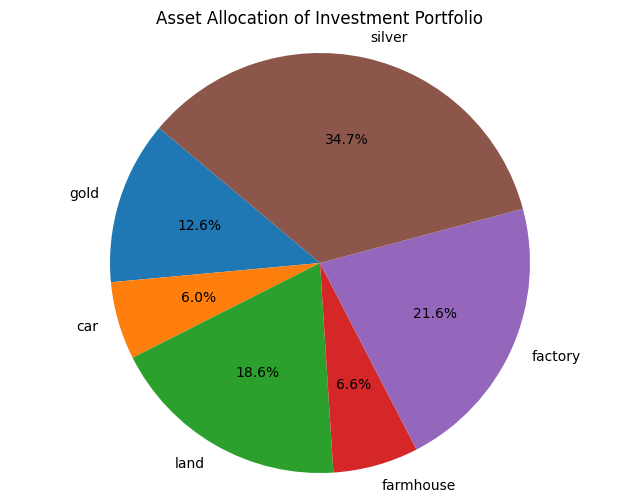

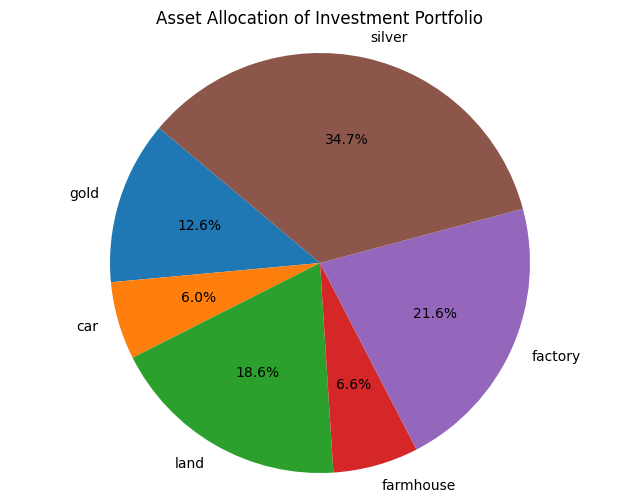

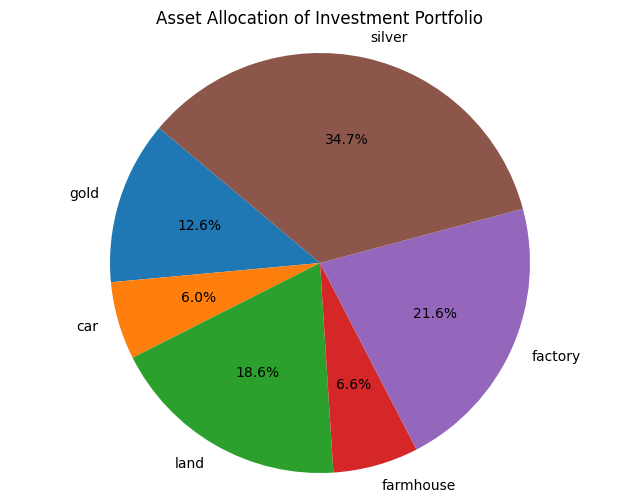

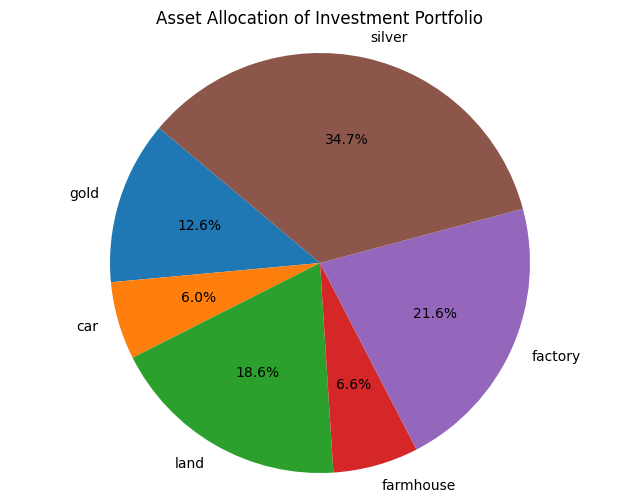

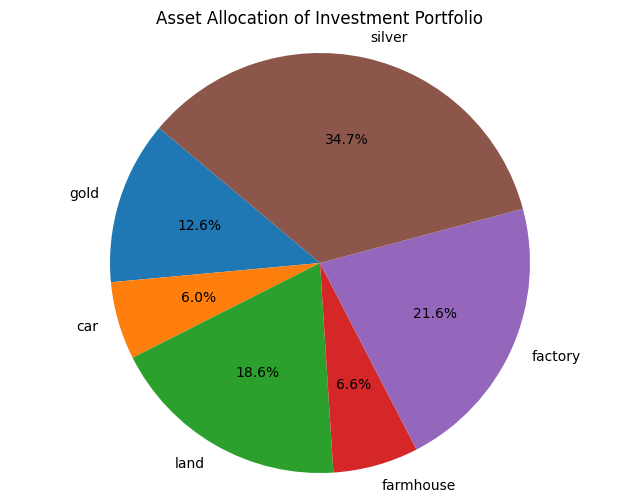

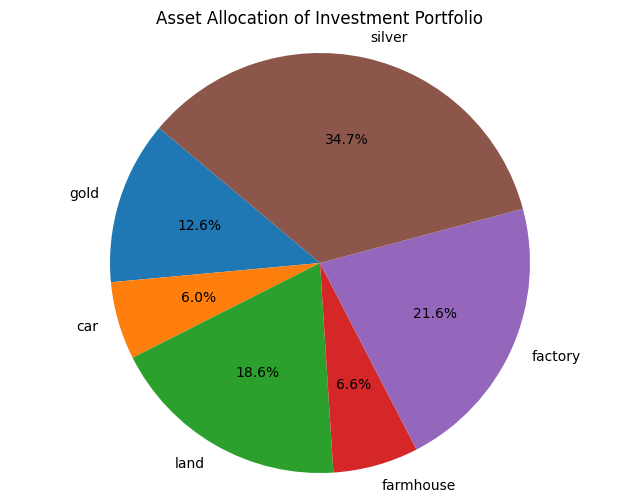

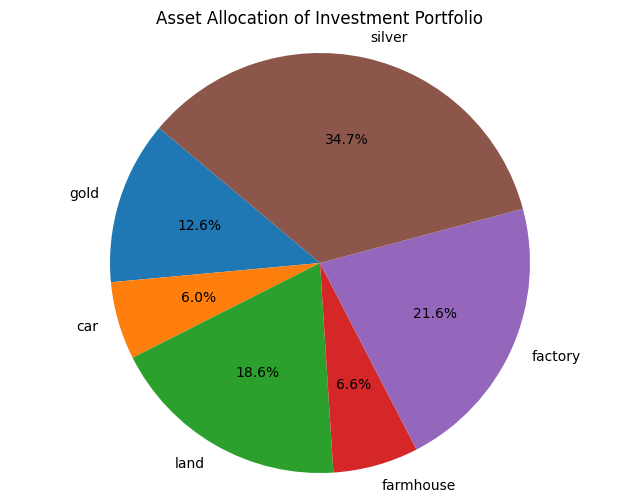

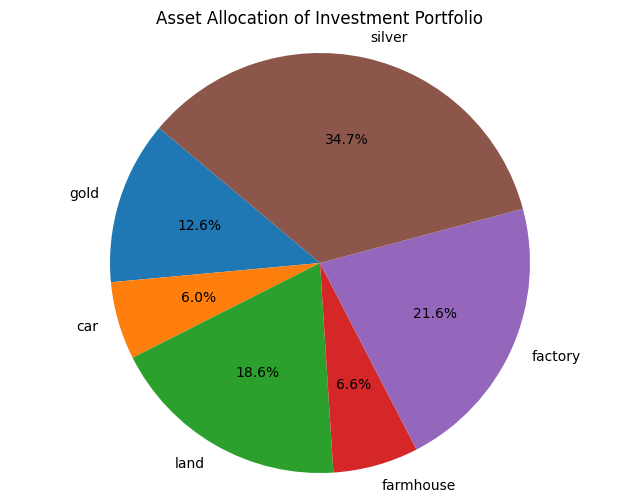

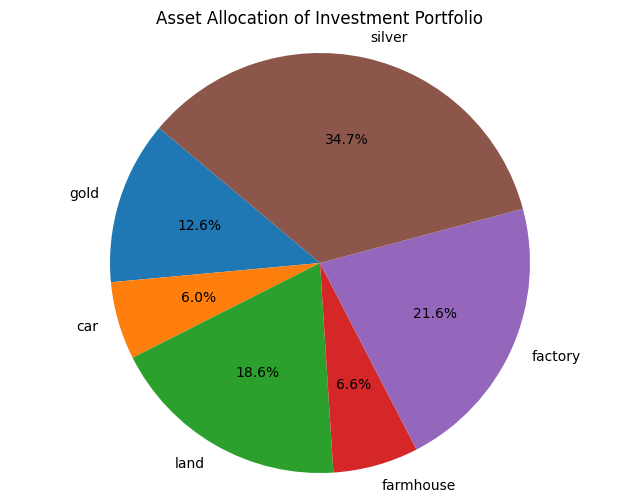

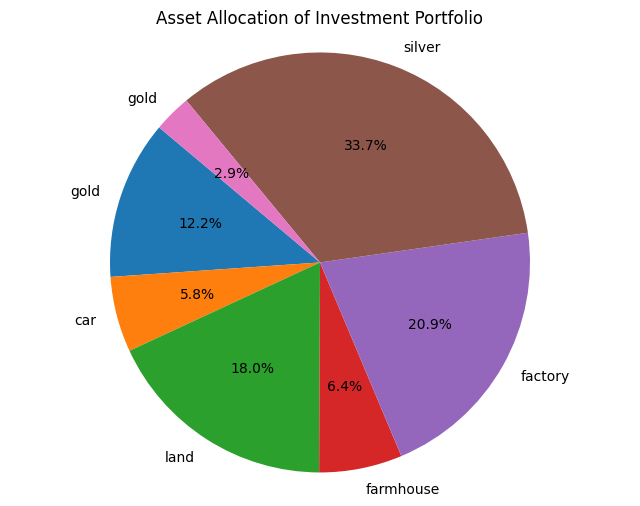

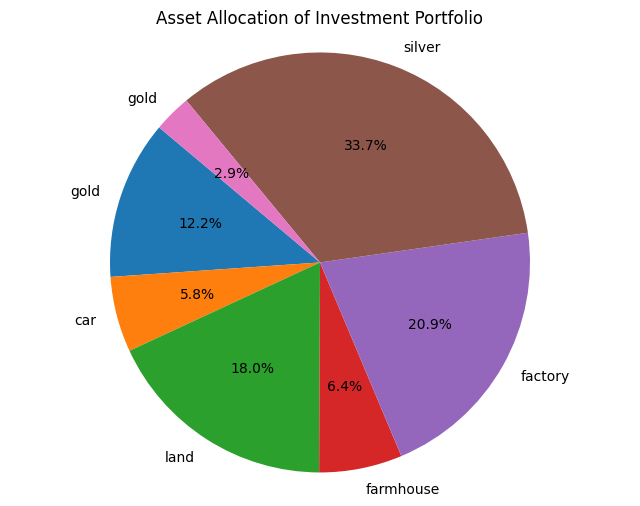

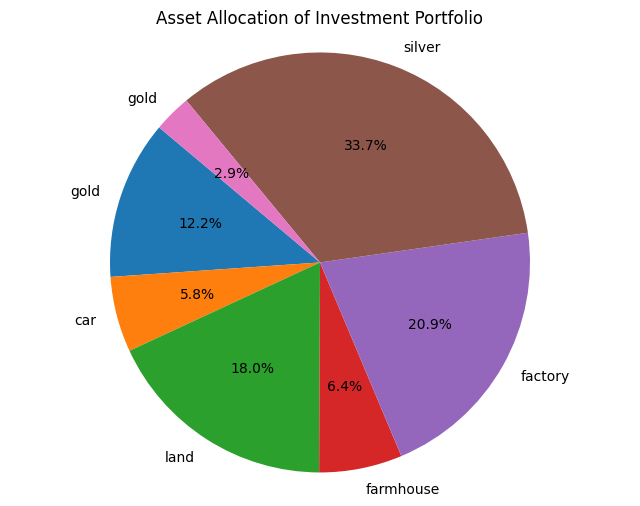

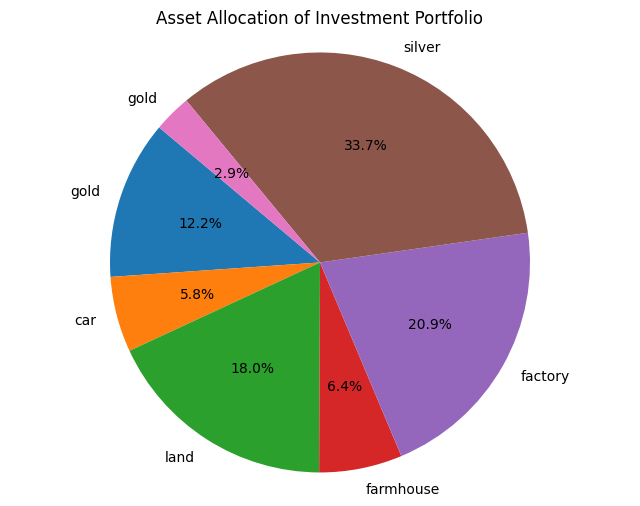

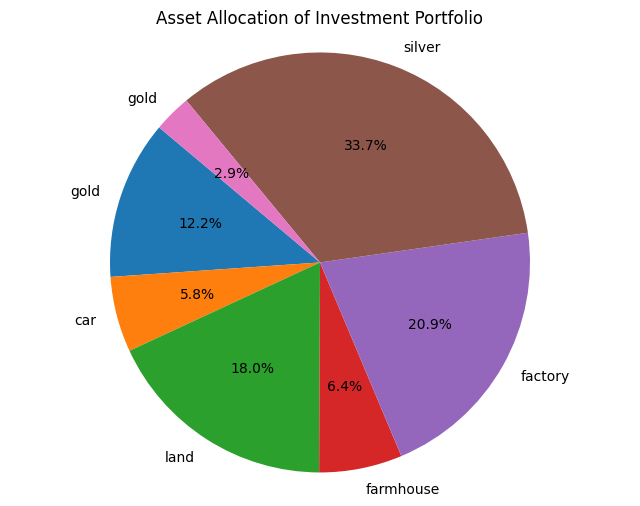

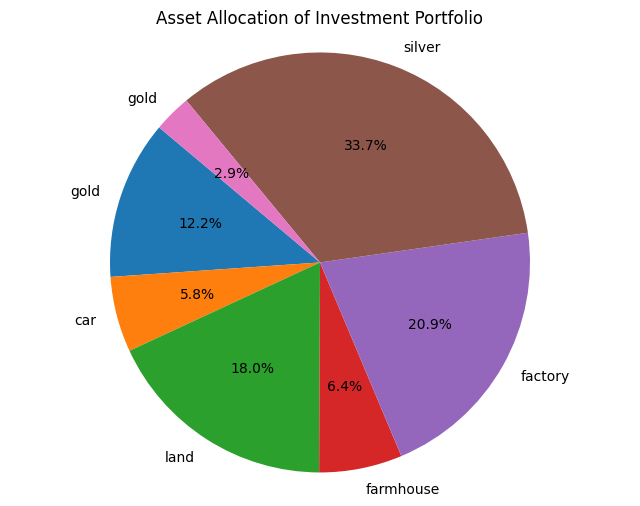

In [1]:
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt


class PortfolioAnalyzer:
    def __init__(self, master):
        self.master = master
        master.title("Financial Portfolio Analyzer")

        self.assets = []  # List to store asset names
        self.values = []  # List to store asset values

        # Label: Title
        self.label = tk.Label(master, text="Enter Your Investment Portfolio")
        self.label.pack(pady=10)

        # Input: Asset Name
        self.asset_label = tk.Label(master, text="Asset Name:")
        self.asset_label.pack()
        self.asset_entry = tk.Entry(master, width=30)
        self.asset_entry.pack(pady=5)

        # Input: Asset Value
        self.value_label = tk.Label(master, text="Asset Value ($):")
        self.value_label.pack()
        self.value_entry = tk.Entry(master, width=30)
        self.value_entry.pack(pady=5)

        # Button: Add Asset
        self.add_asset_button = tk.Button(
            master, text="Add Asset", command=self.add_asset
        )
        self.add_asset_button.pack(pady=10)

        # Button: Show Asset Allocation
        self.show_allocation_button = tk.Button(
            master, text="Show Asset Allocation", command=self.show_allocation
        )
        self.show_allocation_button.pack(pady=10)

    def add_asset(self):
        """Add an asset with its name and value to the portfolio."""
        asset_name = self.asset_entry.get().strip()
        asset_value = self.value_entry.get().strip()

        # Validate inputs
        if not asset_name:
            messagebox.showerror("Error", "Asset name cannot be empty.")
            return

        if not asset_value.replace('.', '', 1).isdigit():
            messagebox.showerror("Error", "Asset value must be a valid number.")
            return

        # Add asset to portfolio
        self.assets.append(asset_name)
        self.values.append(float(asset_value))

        # Clear input fields
        self.asset_entry.delete(0, tk.END)
        self.value_entry.delete(0, tk.END)

        # Confirmation message
        messagebox.showinfo("Success", f"Added asset: {asset_name} with value: ${asset_value}.")

    def show_allocation(self):
        """Display a pie chart of the asset allocation."""
        if not self.assets:
            messagebox.showwarning("No Data", "No assets logged.")
            return

        # Plot pie chart
        plt.figure(figsize=(8, 6))
        plt.pie(
            self.values, labels=self.assets, autopct='%1.1f%%', startangle=140
        )
        plt.axis('equal')  # Equal aspect ratio to ensure the pie chart is circular
        plt.title("Asset Allocation of Investment Portfolio")
        plt.show()


if __name__ == "__main__":
    root = tk.Tk()
    portfolio_analyzer = PortfolioAnalyzer(root)
    root.mainloop()
